In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("movie_dataset.csv")

In [3]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
df.shape

(4803, 24)

In [5]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
total

homepage                3091
tagline                  844
keywords                 412
cast                      43
director                  30
genres                    28
overview                   3
runtime                    2
release_date               1
popularity                 0
budget                     0
id                         0
original_language          0
original_title             0
production_countries       0
production_companies       0
crew                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
index                      0
dtype: int64

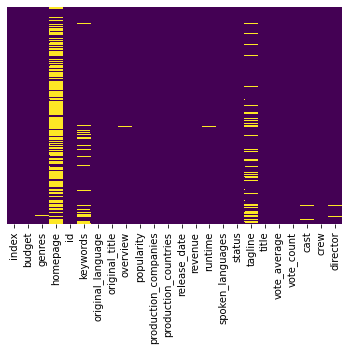

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
features = ['keywords', 'director', 'genres', 'cast']

In [9]:
for feature in features:
    df[feature] = df[feature].fillna('')

In [10]:
def combine_features(row):
    return row['keywords'] + " " + row['director'] + " " + row['genres'] + " " + row['cast']

In [11]:
df['combined_feat'] = df.apply(combine_features, axis = 1)

In [12]:
df['combined_feat'].head()

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Sam...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: combined_feat, dtype: object

In [13]:
cv = CountVectorizer()

In [14]:
count_matrix = cv.fit_transform(df['combined_feat'])

In [15]:
cosine_sim = cosine_similarity(count_matrix)

In [16]:
# Helper Functions:
def get_title_from_index(index):
    return df[df.index == index]['title'].values[0]

def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

In [22]:
movie_user_likes = "Spectre"

In [23]:
movie_index = get_index_from_title(movie_user_likes)

In [24]:
similar_movies = list(enumerate(cosine_sim[movie_index]))

In [25]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)

In [26]:
i=0
print("Top 5 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>5:
        break

Top 5 similar movies to Spectre are:

Spectre
Skyfall
Quantum of Solace
The Girl with the Dragon Tattoo
The Hunger Games: Catching Fire
Johnny English Reborn
